In [7]:
pip install scikit-fuzzy deap yfinance


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.1 MB/s eta 0:00:00


## **1. Implement mathematical operations on fuzzy sets. Also create fuzzy relations by Cartesian product of any two fuzzy sets and perform max-min composition on any two fuzzy relations.**

In [ ]:
import numpy as np

class FuzzySet:
    def __init__(self, elements, membership_values):
        self.elements = elements
        self.membership_values = membership_values

    def __repr__(self):
        return f"FuzzySet({list(zip(self.elements, self.membership_values))})"

    # Operation: Union of two fuzzy sets
    def union(self, other):
        new_elements = list(set(self.elements) | set(other.elements))
        new_membership_values = [max(self.get_membership(e), other.get_membership(e)) for e in new_elements]
        return FuzzySet(new_elements, new_membership_values)

    # Operation: Intersection of two fuzzy sets
    def intersection(self, other):
        new_elements = list(set(self.elements) & set(other.elements))
        new_membership_values = [min(self.get_membership(e), other.get_membership(e)) for e in new_elements]
        return FuzzySet(new_elements, new_membership_values)

    # Operation: Complement of the fuzzy set
    def complement(self):
        new_membership_values = [1 - m for m in self.membership_values]
        return FuzzySet(self.elements, new_membership_values)

    # Get membership value of an element
    def get_membership(self, element):
        if element in self.elements:
            return self.membership_values[self.elements.index(element)]
        else:
            return 0.0

class FuzzyRelation:
    def __init__(self, set1, set2, relation_values):
        self.set1 = set1
        self.set2 = set2
        self.relation_values = relation_values

    def __repr__(self):
        return f"FuzzyRelation({self.relation_values})"

    # Max-Min composition of two fuzzy relations
    @staticmethod
    def max_min_composition(R, S):
        # R: Fuzzy relation between set1 and set2
        # S: Fuzzy relation between set2 and set3
        set1 = R.set1
        set2 = R.set2
        set3 = S.set2

        result_relation = []

        # Iterate over each pair in set1 and set3
        for x in set1.elements:
            row = []
            for z in set3.elements:
                max_min_value = 0
                for y in set2.elements:
                    r_xy = R.get_membership(x, y)
                    s_yz = S.get_membership(y, z)
                    max_min_value = max(max_min_value, min(r_xy, s_yz))
                row.append(max_min_value)
            result_relation.append(row)

        return result_relation

    # Get membership value for a pair (x, y)
    def get_membership(self, x, y):
        if x in self.set1.elements and y in self.set2.elements:
            return self.relation_values[self.set1.elements.index(x)][self.set2.elements.index(y)]
        else:
            return 0.0

# Example: Operations on fuzzy sets
A = FuzzySet([160, 170, 180], [0.2, 0.5, 0.9])
B = FuzzySet([160, 170, 180], [0.6, 0.7, 0.8])

# Union of A and B
union_result = A.union(B)
print(f"Union of A and B: {union_result}")

# Intersection of A and B
intersection_result = A.intersection(B)
print(f"Intersection of A and B: {intersection_result}")

# Complement of A
complement_A = A.complement()
print(f"Complement of A: {complement_A}")

# Example: Creating fuzzy relations and performing max-min composition
# Relation between two fuzzy sets (A and B) using Cartesian product
R_values = [
    [0.3, 0.6, 0.5],  # Relation values for A x A
    [0.4, 0.7, 0.8],
    [0.2, 0.6, 0.9]
]
S_values = [
    [0.3, 0.5, 0.6],  # Relation values for A x B
    [0.4, 0.6, 0.7],
    [0.5, 0.7, 0.9]
]

R = FuzzyRelation(A, A, R_values)
S = FuzzyRelation(A, B, S_values)
print("Fuzzy Relation R : ",R)
print("Fuzzy Relation S : ",S)

# Max-min composition of R and S
composition_result = FuzzyRelation.max_min_composition(R, S)
print(f"Max-Min Composition of R and S: {composition_result}")


## **2. Solve Air Conditioner Controller using MATLAB Fuzzy logic toolbox or Octave or Python.**

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define fuzzy variables
temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature')  # 0 to 40 degrees
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')       # 0 to 100%
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')     # 0 to 100%

# Membership functions
temperature['low'] = fuzz.trapmf(temperature.universe, [0, 0, 15, 25])
temperature['medium'] = fuzz.trimf(temperature.universe, [15, 25, 35])
temperature['high'] = fuzz.trapmf(temperature.universe, [25, 35, 40, 40])

humidity['low'] = fuzz.trapmf(humidity.universe, [0, 0, 30, 50])
humidity['medium'] = fuzz.trimf(humidity.universe, [30, 50, 70])
humidity['high'] = fuzz.trapmf(humidity.universe, [50, 70, 100, 100])

fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [25, 50, 75])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [50, 100, 100])

# Fuzzy rules
rule1 = ctrl.Rule(temperature['high'] & humidity['high'], fan_speed['high'])
rule2 = ctrl.Rule(temperature['high'] & humidity['medium'], fan_speed['medium'])
rule3 = ctrl.Rule(temperature['medium'] & humidity['low'], fan_speed['medium'])
rule4 = ctrl.Rule(temperature['low'] & humidity['low'], fan_speed['low'])

# Control system
fan_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
fan_simulation = ctrl.ControlSystemSimulation(fan_control)

# Simulate
fan_simulation.input['temperature'] = 30  # Example input temperature
fan_simulation.input['humidity'] = 60    # Example input humidity
fan_simulation.compute()

# Output
print(f"Fan Speed: {fan_simulation.output['fan_speed']}%")


Fan Speed: 65.45160967806439%


## **3. Write a program to apply fuzzy logic for controlling a simulated robotic arm using fuzzy logic.**

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define fuzzy variables
error = ctrl.Antecedent(np.arange(-10, 11, 1), 'error')  # Position error (-10 to 10 degrees)
rate_of_error = ctrl.Antecedent(np.arange(-5, 6, 1), 'rate_of_error')  # Rate of change of error (-5 to 5 degrees/step)
correction = ctrl.Consequent(np.arange(-10, 11, 1), 'correction')  # Correction angle (-10 to 10 degrees)

# Membership functions for error
error['negative'] = fuzz.trapmf(error.universe, [-10, -10, -5, 0])
error['zero'] = fuzz.trimf(error.universe, [-5, 0, 5])
error['positive'] = fuzz.trapmf(error.universe, [0, 5, 10, 10])

# Membership functions for rate of error
rate_of_error['negative'] = fuzz.trapmf(rate_of_error.universe, [-5, -5, -2.5, 0])
rate_of_error['zero'] = fuzz.trimf(rate_of_error.universe, [-2.5, 0, 2.5])
rate_of_error['positive'] = fuzz.trapmf(rate_of_error.universe, [0, 2.5, 5, 5])

# Membership functions for correction
correction['negative'] = fuzz.trapmf(correction.universe, [-10, -10, -5, 0])
correction['zero'] = fuzz.trimf(correction.universe, [-5, 0, 5])
correction['positive'] = fuzz.trapmf(correction.universe, [0, 5, 10, 10])

# Define fuzzy rules
rule1 = ctrl.Rule(error['negative'] & rate_of_error['negative'], correction['negative'])
rule2 = ctrl.Rule(error['negative'] & rate_of_error['zero'], correction['negative'])
rule3 = ctrl.Rule(error['negative'] & rate_of_error['positive'], correction['zero'])
rule4 = ctrl.Rule(error['zero'] & rate_of_error['negative'], correction['negative'])
rule5 = ctrl.Rule(error['zero'] & rate_of_error['zero'], correction['zero'])
rule6 = ctrl.Rule(error['zero'] & rate_of_error['positive'], correction['positive'])
rule7 = ctrl.Rule(error['positive'] & rate_of_error['negative'], correction['zero'])
rule8 = ctrl.Rule(error['positive'] & rate_of_error['zero'], correction['positive'])
rule9 = ctrl.Rule(error['positive'] & rate_of_error['positive'], correction['positive'])

# Control system
arm_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
arm_simulation = ctrl.ControlSystemSimulation(arm_control)

# Simulate with example inputs
arm_simulation.input['error'] = 7  # Example error (e.g., 7 degrees off)
arm_simulation.input['rate_of_error'] = -1  # Example rate of error (e.g., decreasing at 1 degree/step)

arm_simulation.compute()

# Output
print(f"Correction Angle: {arm_simulation.output['correction']} degrees")

Correction Angle: 3.67605633802817 degrees


## **4. Write a program to optimize the parameters of a machine learning model using Genetic Algorithm.**

In [11]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from deap import base, creator, tools, algorithms
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC

# Load dataset
iris = datasets.load_diabetes()
X, y = iris.data, iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the fitness function
def fitness_function(params):
    C, gamma = params
    C = max(C, 0.1)  # Ensure C is positive
    gamma = max(gamma, 0.01)  # Ensure gamma is non-negative
    model = SVC(C=C, gamma=gamma)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    return scores.mean(),

# Create the genetic algorithm components
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_C", np.random.uniform, 0.1, 10)  # Generate C within valid range
toolbox.register("attr_gamma", np.random.uniform, 0.01, 10)  # Generate gamma within valid range
toolbox.register("individual", tools.initCycle, creator.Individual, (toolbox.attr_C, toolbox.attr_gamma), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness_function)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Genetic Algorithm settings
population = toolbox.population(n=20)
n_generations = 10
cxpb, mutpb = 0.5, 0.2

# Run the genetic algorithm
for gen in range(n_generations):
    offspring = algorithms.varAnd(population, toolbox, cxpb, mutpb)
    for ind in offspring:
        ind.fitness.values = toolbox.evaluate(ind)
    population = toolbox.select(offspring, len(population))

# Extract the best individual
best_individual = tools.selBest(population, k=1)[0]
best_params = best_individual
print(f"Best Parameters: C={best_params[0]:.2f}, gamma={best_params[1]:.2f}")

# Train the final model with the best parameters
best_model = SVC(C=max(best_params[0], 0.1), gamma=max(best_params[1], 0.01))  # Ensure C and gamma are valid
best_model.fit(X_train, y_train)

# Evaluate the final model
accuracy = best_model.score(X_test, y_test)
print(f"Final Model Accuracy: {accuracy:.2f}")

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-pac

Best Parameters: C=12.53, gamma=9.53
Final Model Accuracy: 0.00


## **5. Write a program to predict stock market trends using an artificial neural network.**

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


MultiIndex([(     'Date',     ''),
            ('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.1225
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0096
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0038
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0025
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0021
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0021
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0020
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0021
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0020
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0021
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - l

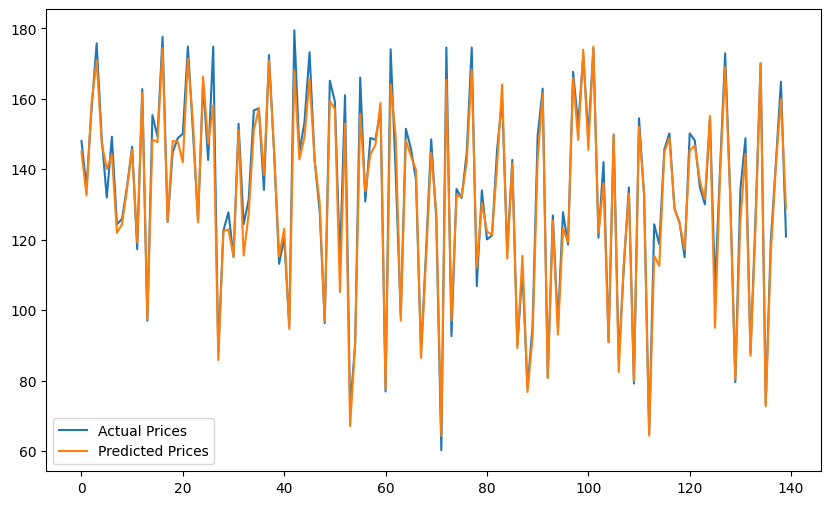

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import yfinance as yf
import matplotlib.pyplot as plt

# Download stock data (e.g., for Apple, ticker 'AAPL')
data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')

# Preprocess the data
data = pd.DataFrame(data)
data.reset_index(inplace=True)  # Ensure 'Date' is a regular column
print(data.columns)

# Use the 'Close' column
data = data[['Date', 'Close']]
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Create features and target
values = data['Close'].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(values.reshape(-1, 1))

# Create a sliding window of inputs and outputs
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i + look_back, 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 60  # Use 60 days of data to predict the next day's price
X, y = create_dataset(scaled_data, look_back)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshape for LSTM input

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=1)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Rescale to original values

# Evaluate the model
actual = scaler.inverse_transform(y_test.reshape(-1, 1))
mse = np.mean((predictions - actual) ** 2)
print(f'Mean Squared Error: {mse}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(actual, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.legend()
plt.show()


In [12]:
pip install yfinance


## **6.1 traveling salesman problem**

In [25]:
import numpy as np
import random

class AntColonyTSP:
    def __init__(self, distances, num_ants, num_iterations, decay, alpha=1, beta=1):
        self.distances = distances
        self.num_ants = num_ants
        self.num_iterations = num_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta
        self.pheromone = np.ones(distances.shape) / len(distances)
        self.best_route = None
        self.best_distance = float('inf')

    def run(self):
        for _ in range(self.num_iterations):
            all_routes = self._construct_solutions()
            self._update_pheromone(all_routes)
            self._update_best_solution(all_routes)
        return self.best_route, self.best_distance

    def _construct_solutions(self):
        all_routes = []
        for _ in range(self.num_ants):
            route = self._build_route()
            all_routes.append(route)
        return all_routes

    def _build_route(self):
        n = len(self.distances)
        visited = [False] * n
        route = []
        start = random.randint(0, n-1)
        route.append(start)
        visited[start] = True

        for _ in range(n - 1):
            current = route[-1]
            probabilities = self._calculate_probabilities(current, visited)
            next_city = np.random.choice(range(n), p=probabilities)
            route.append(next_city)
            visited[next_city] = True

        route.append(route[0])  # Return to start
        return route

    def _calculate_probabilities(self, current, visited):
        pheromone = self.pheromone[current]
        heuristic = 1 / (self.distances[current] + 1e-10)  # Avoid division by zero
        visited = np.array(visited)  # Convert visited list to a numpy array
        pheromone = pheromone * (1 - visited)  # Only consider unvisited cities
        probabilities = pheromone ** self.alpha * heuristic ** self.beta
        return probabilities / probabilities.sum()

    def _update_pheromone(self, all_routes):
        self.pheromone *= (1 - self.decay)
        for route in all_routes:
            distance = self._calculate_distance(route)
            pheromone_contribution = 1 / distance
            for i in range(len(route) - 1):
                self.pheromone[route[i], route[i + 1]] += pheromone_contribution

    def _calculate_distance(self, route):
        return sum(self.distances[route[i], route[i + 1]] for i in range(len(route) - 1))

    def _update_best_solution(self, all_routes):
        for route in all_routes:
            distance = self._calculate_distance(route)
            if distance < self.best_distance:
                self.best_distance = distance
                self.best_route = route

# Example usage
distances = np.array([[0, 10, 15, 20],
                      [10, 0, 35, 25],
                      [15, 35, 0, 30],
                      [20, 25, 30, 0]])

tsp_solver = AntColonyTSP(distances, num_ants=10, num_iterations=100, decay=0.1)
best_route, best_distance = tsp_solver.run()

print("Best Route:", best_route)
print("Best Distance:", best_distance)


Best Route: [1, 0, 2, 3, 1]
Best Distance: 80


## **6.2 Data Clustering problem using ant colony optimization.**

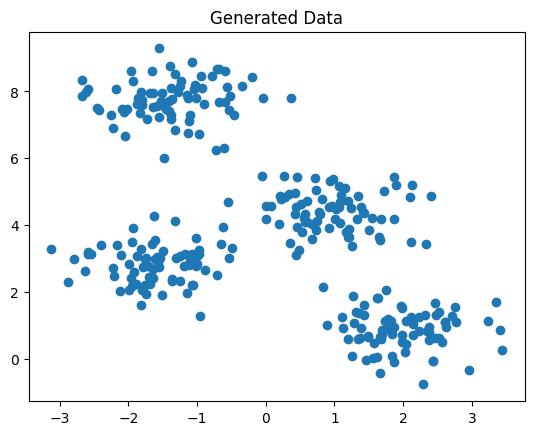

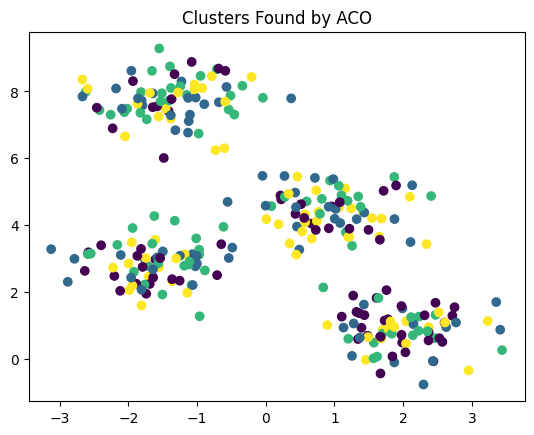

In [27]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

class AntColonyClustering:
    def __init__(self, n_clusters, n_ants, n_iterations, decay, alpha=1, beta=1):
        self.n_clusters = n_clusters
        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta
        self.pheromone = None
        self.cluster_centroids = None

    def fit(self, data):
        num_samples, num_features = data.shape
        # Initialize cluster centroids randomly from data points
        initial_indices = np.random.choice(num_samples, self.n_clusters, replace=False)
        self.cluster_centroids = data[initial_indices]
        self.pheromone = np.ones((self.n_clusters)) / self.n_clusters

        for _ in range(self.n_iterations):
            self._update_pheromone(data)
            self._update_cluster_centroids(data)

    def _update_pheromone(self, data):
        for _ in range(self.n_ants):
            clusters = self._assign_clusters(data)
            for i in range(len(data)):
                # Update pheromone based on cluster assignment
                cluster_index = clusters[i]
                self.pheromone[cluster_index] += 1 / (self._calculate_distance(data[i], self.cluster_centroids[cluster_index]) + 1e-10)

        self.pheromone *= (1 - self.decay)  # Decay pheromone over iterations

    def _assign_clusters(self, data):
        clusters = []
        for point in data:
            probabilities = self._calculate_probabilities(point)
            cluster = np.random.choice(range(self.n_clusters), p=probabilities)
            clusters.append(cluster)
        return clusters

    def _calculate_probabilities(self, point):
        # Calculate distances to each cluster center
        distances = np.linalg.norm(point - self.cluster_centroids, axis=1)
        # Calculate probabilities based on pheromone strength and distance
        pheromone_strength = self.pheromone  # Pheromone strength per cluster
        probabilities = pheromone_strength ** self.alpha / (distances ** self.beta + 1e-10)
        return probabilities / probabilities.sum()

    def _calculate_distance(self, point, centroid):
        return np.linalg.norm(point - centroid)

    def _update_cluster_centroids(self, data):
        # Recalculate centroids as the mean of points assigned to each cluster
        clusters = self._assign_clusters(data)
        for i in range(self.n_clusters):
            cluster_points = data[np.array(clusters) == i]
            if len(cluster_points) > 0:
                self.cluster_centroids[i] = np.mean(cluster_points, axis=0)

    def predict(self, data):
        return self._assign_clusters(data)

# Example usage
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(data[:, 0], data[:, 1])
plt.title("Generated Data")
plt.show()

aco_clustering = AntColonyClustering(n_clusters=4, n_ants=10, n_iterations=100, decay=0.1)
aco_clustering.fit(data)
predicted_clusters = aco_clustering.predict(data)

plt.scatter(data[:, 0], data[:, 1], c=predicted_clusters, cmap='viridis')
plt.title("Clusters Found by ACO")
plt.show()


## **7.1  Warehouse Layout Optimization**

In [31]:
import numpy as np

class Particle:
    def __init__(self, position, velocity):
        self.position = position  # Current position (layout)
        self.velocity = velocity  # Current velocity
        self.best_position = position.copy()  # Best position found
        self.best_value = float('inf')  # Best value at the best position

class PSOWarehouseOptimizer:
    def __init__(self, n_particles, n_iterations, warehouse_layout, decay=0.9):
        self.n_particles = n_particles
        self.n_iterations = n_iterations
        self.warehouse_layout = warehouse_layout  # Fixed positions of shelves
        self.decay = decay
        self.particles = []

    def optimize(self):
        # Initialize particles
        for _ in range(self.n_particles):
            position = np.random.permutation(self.warehouse_layout).astype(float)  # Keep position as float
            velocity = np.random.rand(len(self.warehouse_layout)) * 0.1
            self.particles.append(Particle(position, velocity))

        global_best_position = None
        global_best_value = float('inf')

        for _ in range(self.n_iterations):
            for particle in self.particles:
                value = self.evaluate(particle.position)
                # Update personal best
                if value < particle.best_value:
                    particle.best_value = value
                    particle.best_position = particle.position.copy()

                # Update global best
                if value < global_best_value:
                    global_best_value = value
                    global_best_position = particle.position.copy()

            # Update velocities and positions
            for particle in self.particles:
                inertia = self.decay * particle.velocity
                cognitive = np.random.rand(len(particle.position)) * (particle.best_position - particle.position)
                social = np.random.rand(len(particle.position)) * (global_best_position - particle.position)
                particle.velocity = inertia + cognitive + social
                particle.position += particle.velocity

                # Keep the position within bounds and convert to integers for the final layout
                particle.position = np.clip(np.round(particle.position), 0, len(self.warehouse_layout) - 1)

        # Convert final positions to integers for output
        return particle.best_position.astype(int), global_best_value

    def evaluate(self, layout):
        # Example evaluation: minimize distance traveled in a simple linear layout
        return np.sum(np.abs(np.diff(layout)))

# Example usage
warehouse_layout = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])  # Fixed positions
optimizer = PSOWarehouseOptimizer(n_particles=30, n_iterations=100, warehouse_layout=warehouse_layout)
best_layout, best_value = optimizer.optimize()

print("Optimized Layout:", best_layout)
print("Minimum Travel Distance:", best_value)


Optimized Layout: [3 4 5 5 6 6 6 6 1 0]
Minimum Travel Distance: 3.0


## **7.2 Data Clustering**

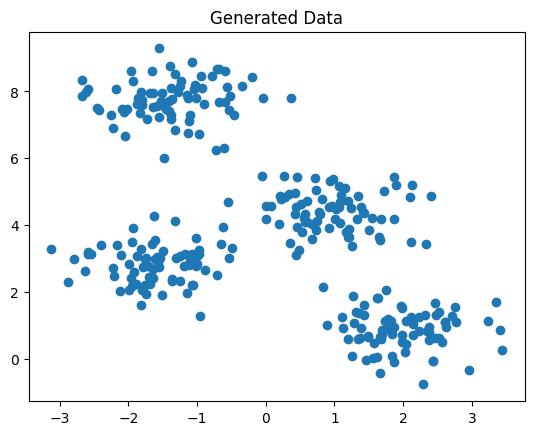

Optimized Centroids: [[0.         3.33265493]
 [1.02771041 4.57243287]
 [0.         7.79451727]
 [1.95994165 0.81702401]]
Minimum Clustering Cost: 554.4175912645601


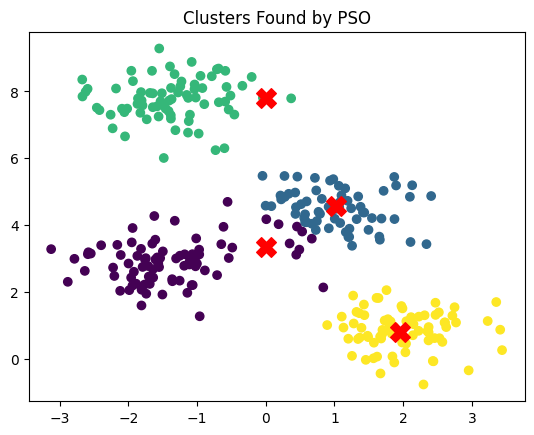

In [29]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

class PSOClustering:
    def __init__(self, n_clusters, n_particles, n_iterations):
        self.n_clusters = n_clusters
        self.n_particles = n_particles
        self.n_iterations = n_iterations
        self.particles = []

    def fit(self, data):
        # Initialize particles with random cluster centroids
        for _ in range(self.n_particles):
            centroids = np.random.rand(self.n_clusters, data.shape[1]) * np.max(data, axis=0)
            velocity = np.random.rand(self.n_clusters, data.shape[1]) * 0.1
            self.particles.append(Particle(centroids, velocity))

        global_best_position = None
        global_best_value = float('inf')

        for _ in range(self.n_iterations):
            for particle in self.particles:
                value = self.evaluate(data, particle.position)
                # Update personal best
                if value < particle.best_value:
                    particle.best_value = value
                    particle.best_position = particle.position.copy()

                # Update global best
                if value < global_best_value:
                    global_best_value = value
                    global_best_position = particle.position.copy()

            # Update velocities and positions
            for particle in self.particles:
                inertia = 0.5 * particle.velocity
                cognitive = np.random.rand(self.n_clusters, data.shape[1]) * (particle.best_position - particle.position)
                social = np.random.rand(self.n_clusters, data.shape[1]) * (global_best_position - particle.position)
                particle.velocity = inertia + cognitive + social
                particle.position += particle.velocity
                # Keep centroids within data bounds
                particle.position = np.clip(particle.position, 0, np.max(data, axis=0))

        return global_best_position, global_best_value

    def evaluate(self, data, centroids):
        # Calculate the sum of squared distances from points to their nearest centroid
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        closest_centroids = np.argmin(distances, axis=1)
        return np.sum(np.min(distances, axis=1)**2)

# Example usage
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(data[:, 0], data[:, 1])
plt.title("Generated Data")
plt.show()

pso_clustering = PSOClustering(n_clusters=4, n_particles=30, n_iterations=100)
best_centroids, best_value = pso_clustering.fit(data)

print("Optimized Centroids:", best_centroids)
print("Minimum Clustering Cost:", best_value)

# Visualize the clusters
distances = np.linalg.norm(data[:, np.newaxis] - best_centroids, axis=2)
predicted_clusters = np.argmin(distances, axis=1)

plt.scatter(data[:, 0], data[:, 1], c=predicted_clusters, cmap='viridis')
plt.scatter(best_centroids[:, 0], best_centroids[:, 1], s=200, c='red', marker='X')  # Plot centroids
plt.title("Clusters Found by PSO")
plt.show()
